<img src="https:////scontent.fhan9-1.fna.fbcdn.net/v/t39.30808-6/339122927_1347965006053141_1323654940389313527_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RxgK2wQBdfIAX9RQ12B&_nc_ht=scontent.fhan9-1.fna&oh=00_AfBOx5rlfgrGYgo-aGWT946hcP3U0n2WBaCcYTFM6OyZww&oe=65506ED3"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>

#  PHÂN TÍCH DỮ LIỆU PAGE [đài phát thanh](https://www.facebook.com/daiphatthanh.sound)
## Bài phân viết phân tích page được viết trong [NOTION](https://www.notion.so/Data-Analyze-Page-Facebook-6ba0209824a04832b291f084f583f6b9).

Phân tích dữ liệu: Một số câu hỏi tiềm năng để phân tích như: Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?; Các mốc thời gian trong ngày mà
Fanpage thường xuyên đăng bài viết?; Số lượt tương tác trong các bài đăng thay
đổi như thế nào?; Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?; Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?; v.v. Ngoài ra, nếu có dữ liệu từ hai trang Fanpage mà
giả sử là hai trang tin tức, sự tương quan giữa nội dung của hai trang Fanpage như
thế nào?; v.v.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv(r'Data\Data_cleared.csv')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             204 non-null    int64  
 1   post_text           204 non-null    object 
 2   time                204 non-null    object 
 3   timestamp           204 non-null    float64
 4   images_description  204 non-null    object 
 5   comments            204 non-null    int64  
 6   shares              204 non-null    int64  
 7   comments_full       204 non-null    object 
 8   reactors            204 non-null    object 
 9   reactions           204 non-null    object 
 10  reaction_count      204 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 17.7+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [110]:
post_df_full1 = df
post_df_full1[['post_id','reactions']].head()

,post_id,reactions
0,914197540072635,"{'like': 88, 'love': 18, 'haha': 16, 'care': 1}"
1,914174400074949,"{'like': 2805, 'love': 1004, 'haha': 7, 'wow':..."
2,914151560077233,"{'like': 2877, 'love': 30, 'haha': 935, 'wow':..."
3,913951943430528,"{'like': 1394, 'love': 268, 'haha': 17, 'wow':..."
4,913920416767014,"{'like': 843, 'love': 191, 'haha': 4, 'wow': 1..."


In [111]:
post_df_full2=post_df_full1[['time','timestamp' ,'reaction_count']]
post_df_full2.head()

,time,timestamp,reaction_count
0,2023-11-28 11:58:32,1.701148e+09,123
1,2023-11-28 10:53:40,1.701144e+09,3845
2,2023-11-28 09:48:24,1.701140e+09,3864
3,2023-11-27 23:59:52,1.701104e+09,1687
4,2023-11-27 22:46:26,1.701100e+09,1044


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## phan tich luong tuong tac theo ngay dang bai.

<BarContainer object of 204 artists>

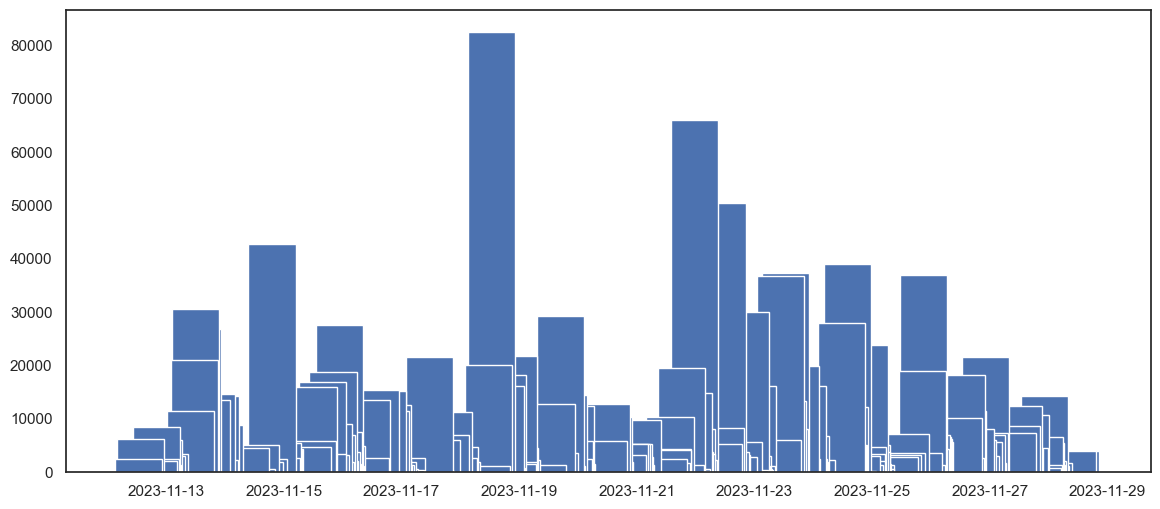

In [154]:
plt.subplots(figsize=(14, 6))
plt.bar(x=df['time'],height=df['reaction_count'])

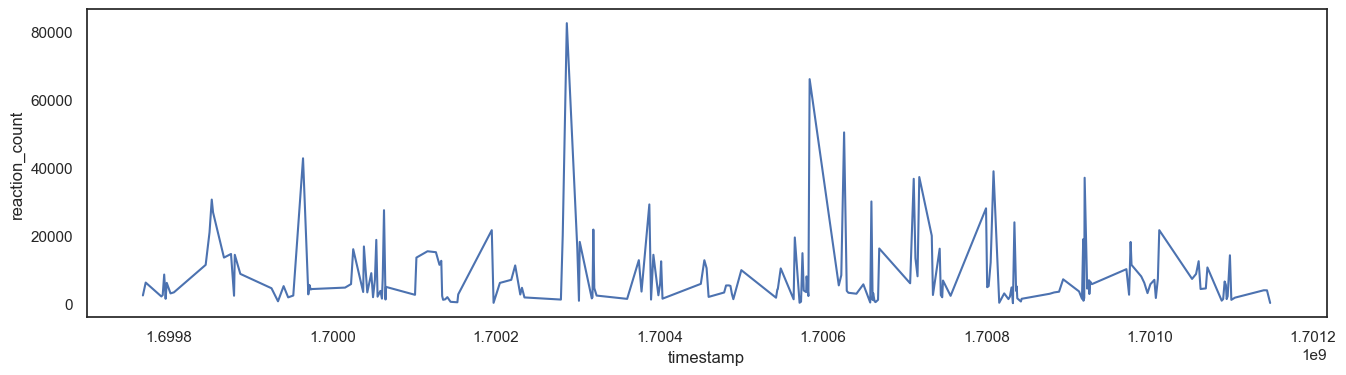

In [113]:
plt.figure(figsize=(16, 4))
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
plt.plot(dates,y)
plt.xlabel('timestamp')
plt.ylabel('reaction_count')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16812\1698235717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])


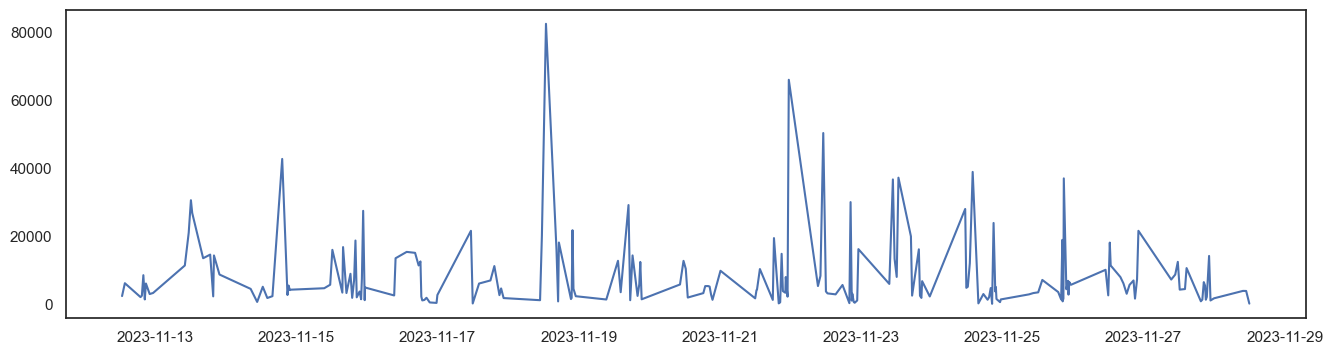

In [114]:
plt.figure(figsize=(16, 4))
post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
dates=post_df_full2['time'].to_list()
y=post_df_full2['reaction_count'].to_list()
plt.plot(dates,y)


In [115]:
df['reaction_count'].describe()

count      204.000000
mean      8372.901961
std      10997.212701
min         64.000000
25%       2091.250000
50%       4471.000000
75%      10734.000000
max      82515.000000
Name: reaction_count, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Đâu là bài viết có lượt tương tác lớn nhất và nhỏ trong bộ dữ liệu ?

In [116]:
display(
    df.nlargest(1,'reaction_count'),
    df.nsmallest(1,'reaction_count')
)

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
135,909089207250135,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,[],1400,1500,"[{'comment_id': '1460715988059959', 'comment_u...","[{'name': 'Minh Hằng', 'link': 'https://facebo...","{'like': 39963, 'love': 34694, 'haha': 2593, '...",82515


,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
52,912335590258830,Nhìn sâu vào chặng đường tìm kiếm bản thân mà ...,2023-11-24 20:31:58,1.700833e+09,[],4,6,"[{'comment_id': '3221295438180288', 'comment_u...","[{'name': 'Phạm Ngọc Minh Quân', 'link': 'http...","{'like': 50, 'love': 14}",64


In [117]:
data = df[['post_text','time','timestamp','reaction_count']]
# thong tin bai post co reaction_count max
reaction_count_max = data['reaction_count'].max()
info_reaction_count_max = data[data['reaction_count']==reaction_count_max]
info_reaction_count_max.index = ['max']
# thong tin bai post co reaction_count min
reaction_count_min = data['reaction_count'].min()
info_reaction_count_min = data[data['reaction_count']==reaction_count_min]
info_reaction_count_min.index = ['min']
info_reaction_count_min_max = pd.concat([info_reaction_count_max,info_reaction_count_min],axis=0)
info_reaction_count_min_max

,post_text,time,timestamp,reaction_count
max,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,82515
min,Nhìn sâu vào chặng đường tìm kiếm bản thân mà ...,2023-11-24 20:31:58,1.700833e+09,64


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Quan he giua cac thanh phan trong reaction.

In [118]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)))
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [119]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']].head()
#'like': 2853, 'love': 2725, 'haha': 8, 'wow': 1, 'care': 79, 'sad': 4

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...,88.0,18.0,16.0,NaN,NaN,NaN,1.0,4,4,123
1,"ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\r\n\r\nSáng 25/11,...",2805.0,1004.0,7.0,2.0,NaN,NaN,27.0,11,20,3845
2,Khi bạn là rapper mainstream nhưng vẫn muốn gi...,2877.0,30.0,935.0,3.0,14.0,NaN,5.0,44,54,3864
3,"Thái VG trở lại với Andy Vũ trong MV ""Điếc"", d...",1394.0,268.0,17.0,3.0,1.0,NaN,4.0,32,17,1687
4,Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...,843.0,191.0,4.0,1.0,1.0,NaN,4.0,32,20,1044


In [120]:
for i in range(0, len(post_df_full_with_reactions['like'].values), 1):
    if pd.isna(post_df_full_with_reactions['like'].values[i]):
        post_df_full_with_reactions['like'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['love'].values[i]):
        post_df_full_with_reactions['love'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['sad'].values[i]):
        post_df_full_with_reactions['sad'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['angry'].values[i]):
        post_df_full_with_reactions['angry'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['care'].values[i]):
        post_df_full_with_reactions['care'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']].head()

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...,88.0,18.0,16.0,0.0,0.0,0.0,1.0,4,4,123
1,"ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\r\n\r\nSáng 25/11,...",2805.0,1004.0,7.0,2.0,0.0,0.0,27.0,11,20,3845
2,Khi bạn là rapper mainstream nhưng vẫn muốn gi...,2877.0,30.0,935.0,3.0,14.0,0.0,5.0,44,54,3864
3,"Thái VG trở lại với Andy Vũ trong MV ""Điếc"", d...",1394.0,268.0,17.0,3.0,1.0,0.0,4.0,32,17,1687
4,Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...,843.0,191.0,4.0,1.0,1.0,0.0,4.0,32,20,1044


In [121]:
post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']].sum()

like              1039037.0
love               264056.0
haha               332023.0
wow                  5447.0
sad                 53632.0
angry                 111.0
care                13766.0
shares              27968.0
comments            53150.0
reaction_count    1708072.0
dtype: float64

<Axes: >

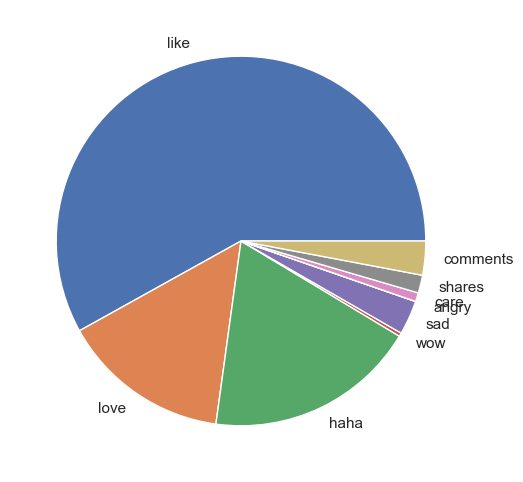

In [122]:
plt.figure(figsize=(8, 8))
df_pie_reactions = post_df_full_with_reactions[['like','love','haha','wow',
                                'sad','angry','care','shares','comments']]
df_pie_reactions.sum().plot(kind='pie', figsize=(14,6))


Text(0, 0.5, 'Số lượng')

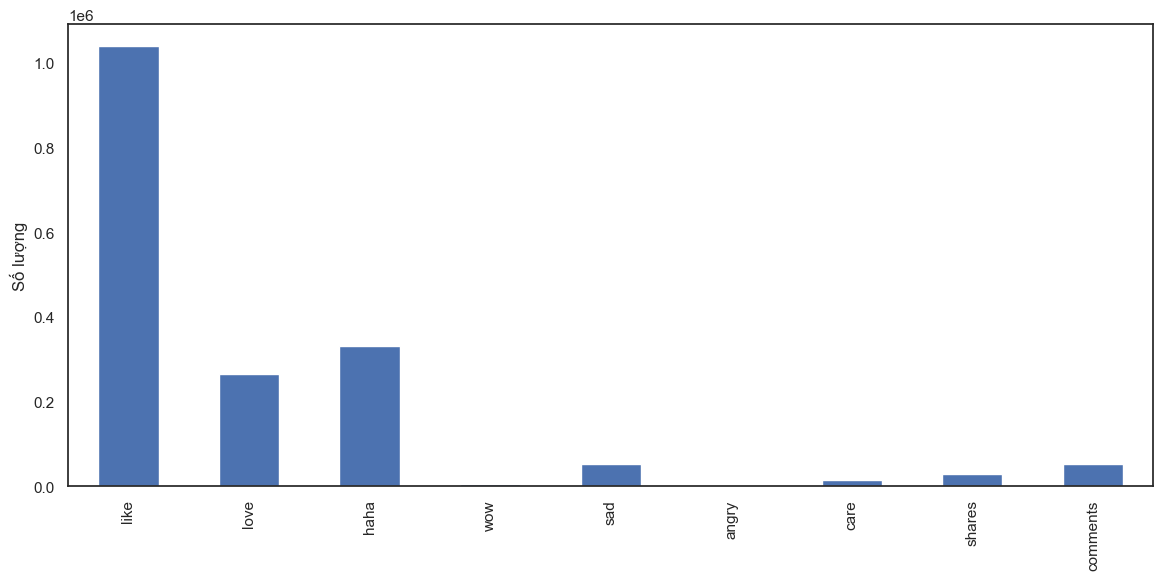

In [123]:
df_bar_reactions = post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care',
                                 'shares','comments']]
ax = df_bar_reactions.sum().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Số lượng')

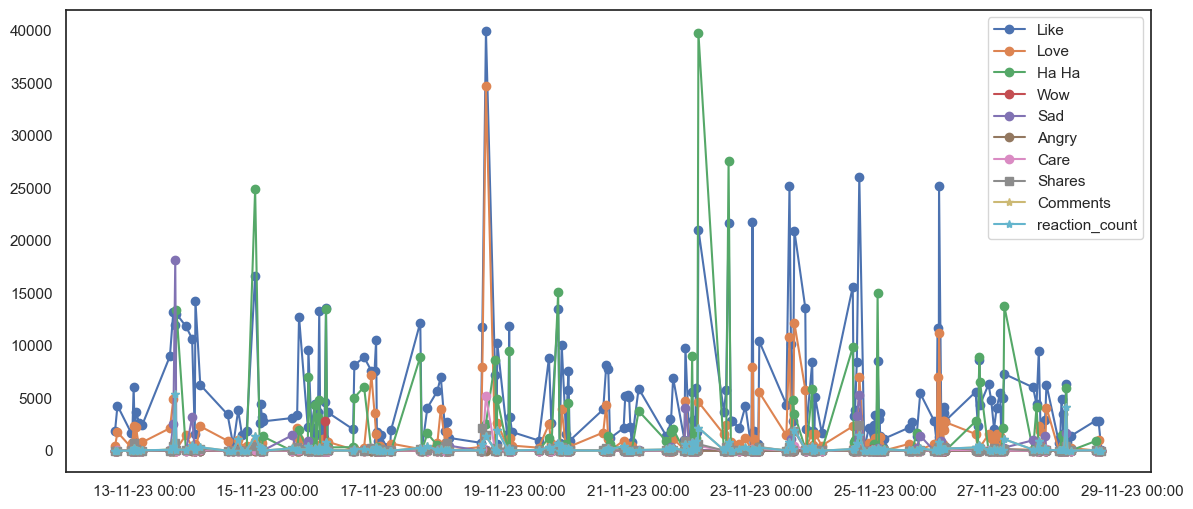

In [124]:
fig, ax = plt.subplots(figsize=(14, 6))
post_df_full_with_reactions['time'] = pd.to_datetime(post_df_full_with_reactions['time'])
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [125]:
# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_with_reactions['shares']))
     

like     0.600260
love     0.613876
haha     0.143462
wow      0.047493
sad      0.300054
angry    0.106246
care     0.442154
dtype: float64


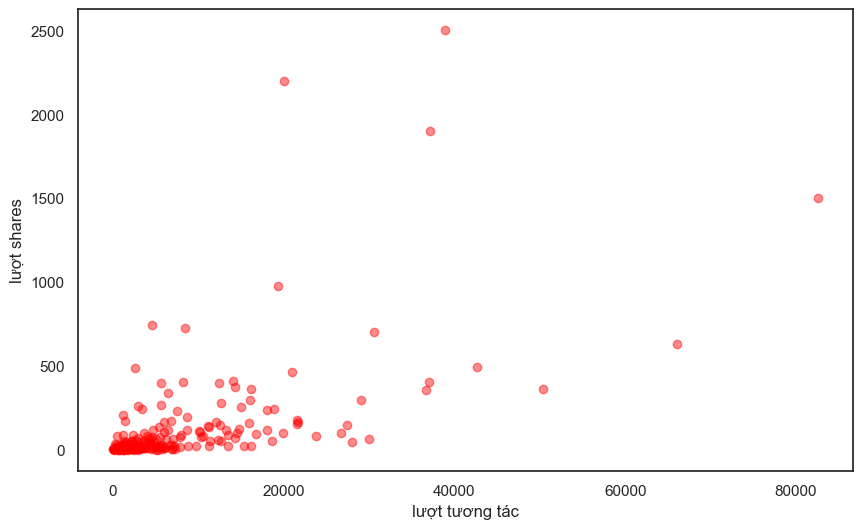

In [126]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['shares'],alpha = 0.45, color = 'red')
plt.xlabel('lượt tương tác')
plt.ylabel('lượt shares')
plt.show()

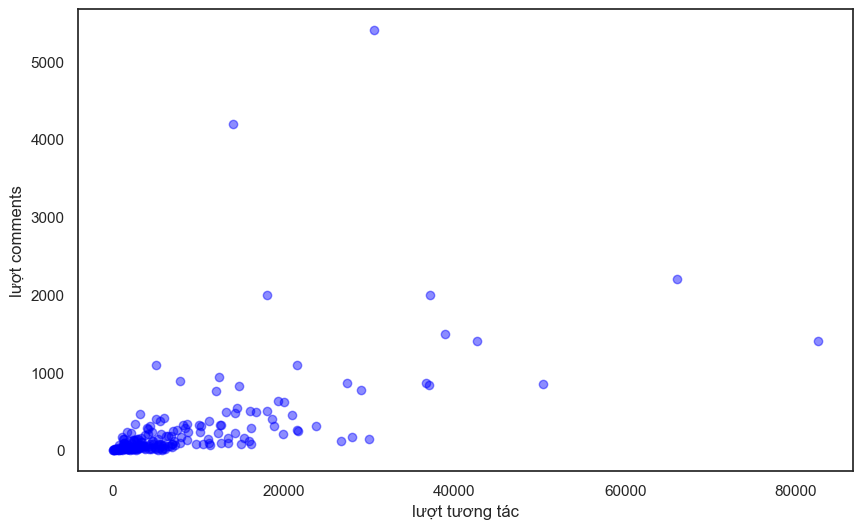

In [127]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['comments'],alpha = 0.45, color = 'blue')
plt.xlabel('lượt tương tác')
plt.ylabel('lượt comments')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

Text(0.5, 1.0, 'Posting frequency by hour')

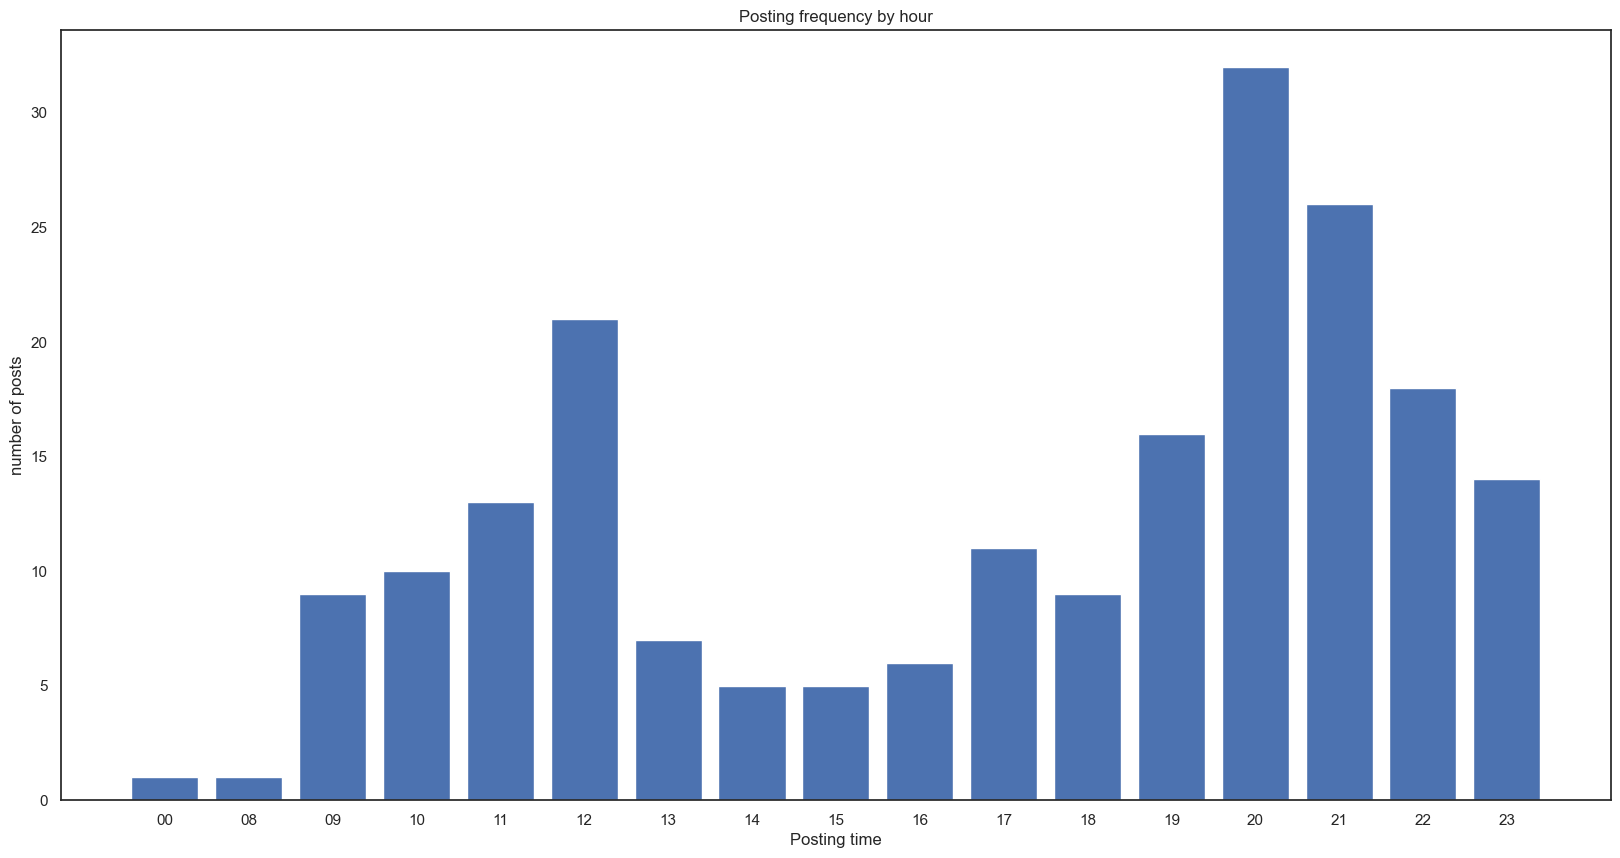

In [128]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[11:13].unique())
number_posts = post_df_full1['time'].str[11:13].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting time')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

In [129]:
display(
    type(day_posts),
    type(number_posts)
)

numpy.ndarray

pandas.core.series.Series

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Lượng bài đăng thay đổi trong các ngày.

Text(0.5, 1.0, 'Posting frequency by hour')

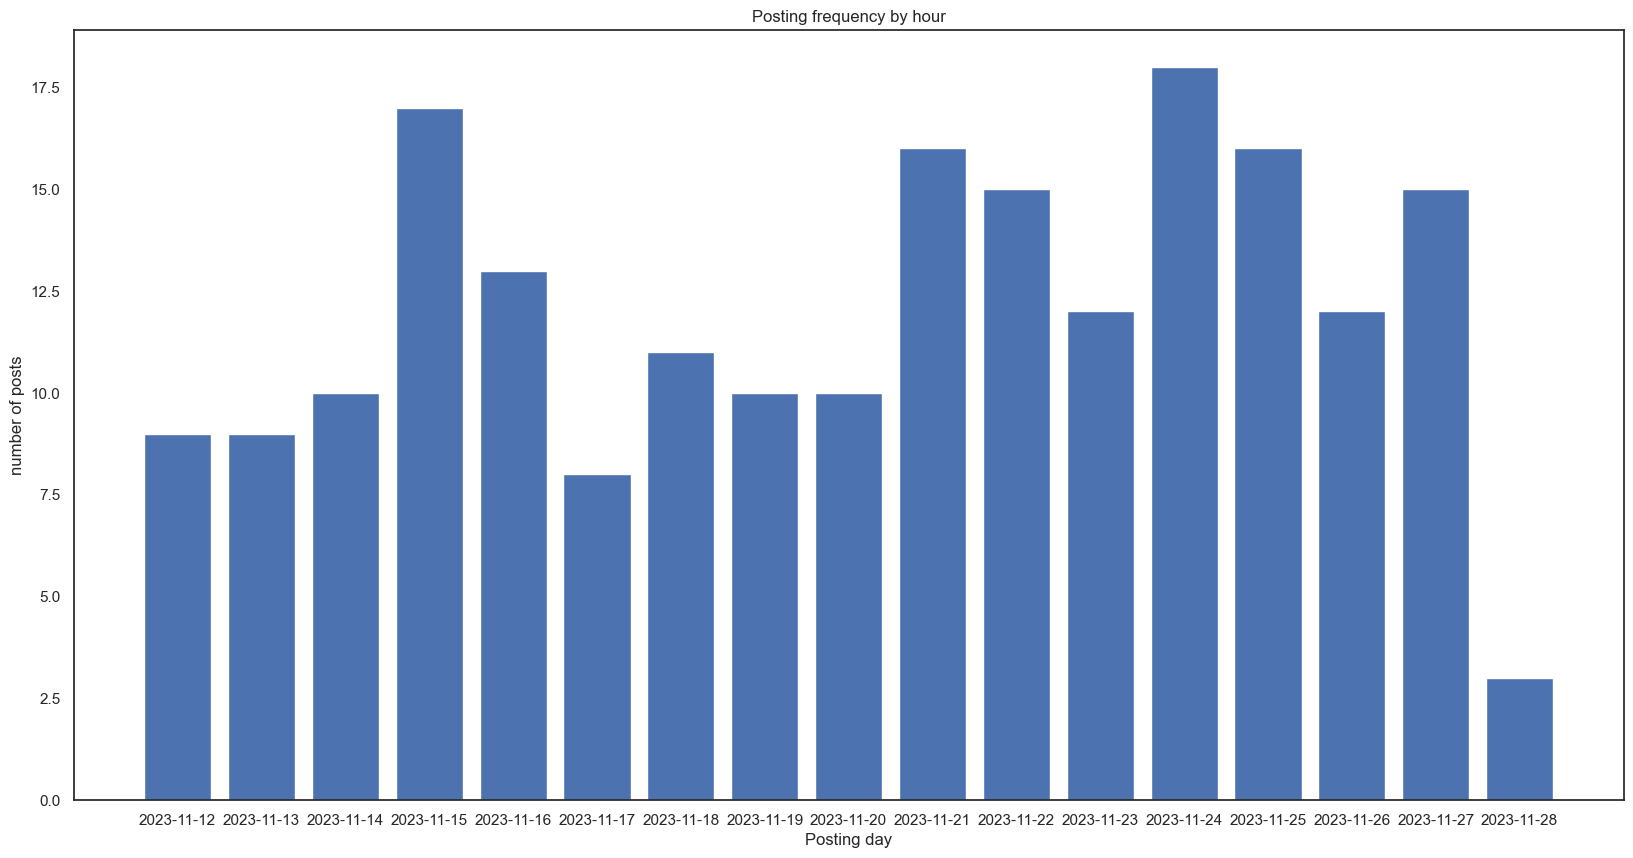

In [130]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[0:10].unique())
number_posts = post_df_full1['time'].str[0:10].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting day')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

In [131]:
display(
    type(day_posts),
    type(number_posts)
)

numpy.ndarray

pandas.core.series.Series

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?;

In [132]:
# sao chep post_text vao mang string.
text = ""
for i in post_df_full1["post_text"]:
    text = text + i + "\n"

In [133]:
# Import thư viện WordCloud 
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

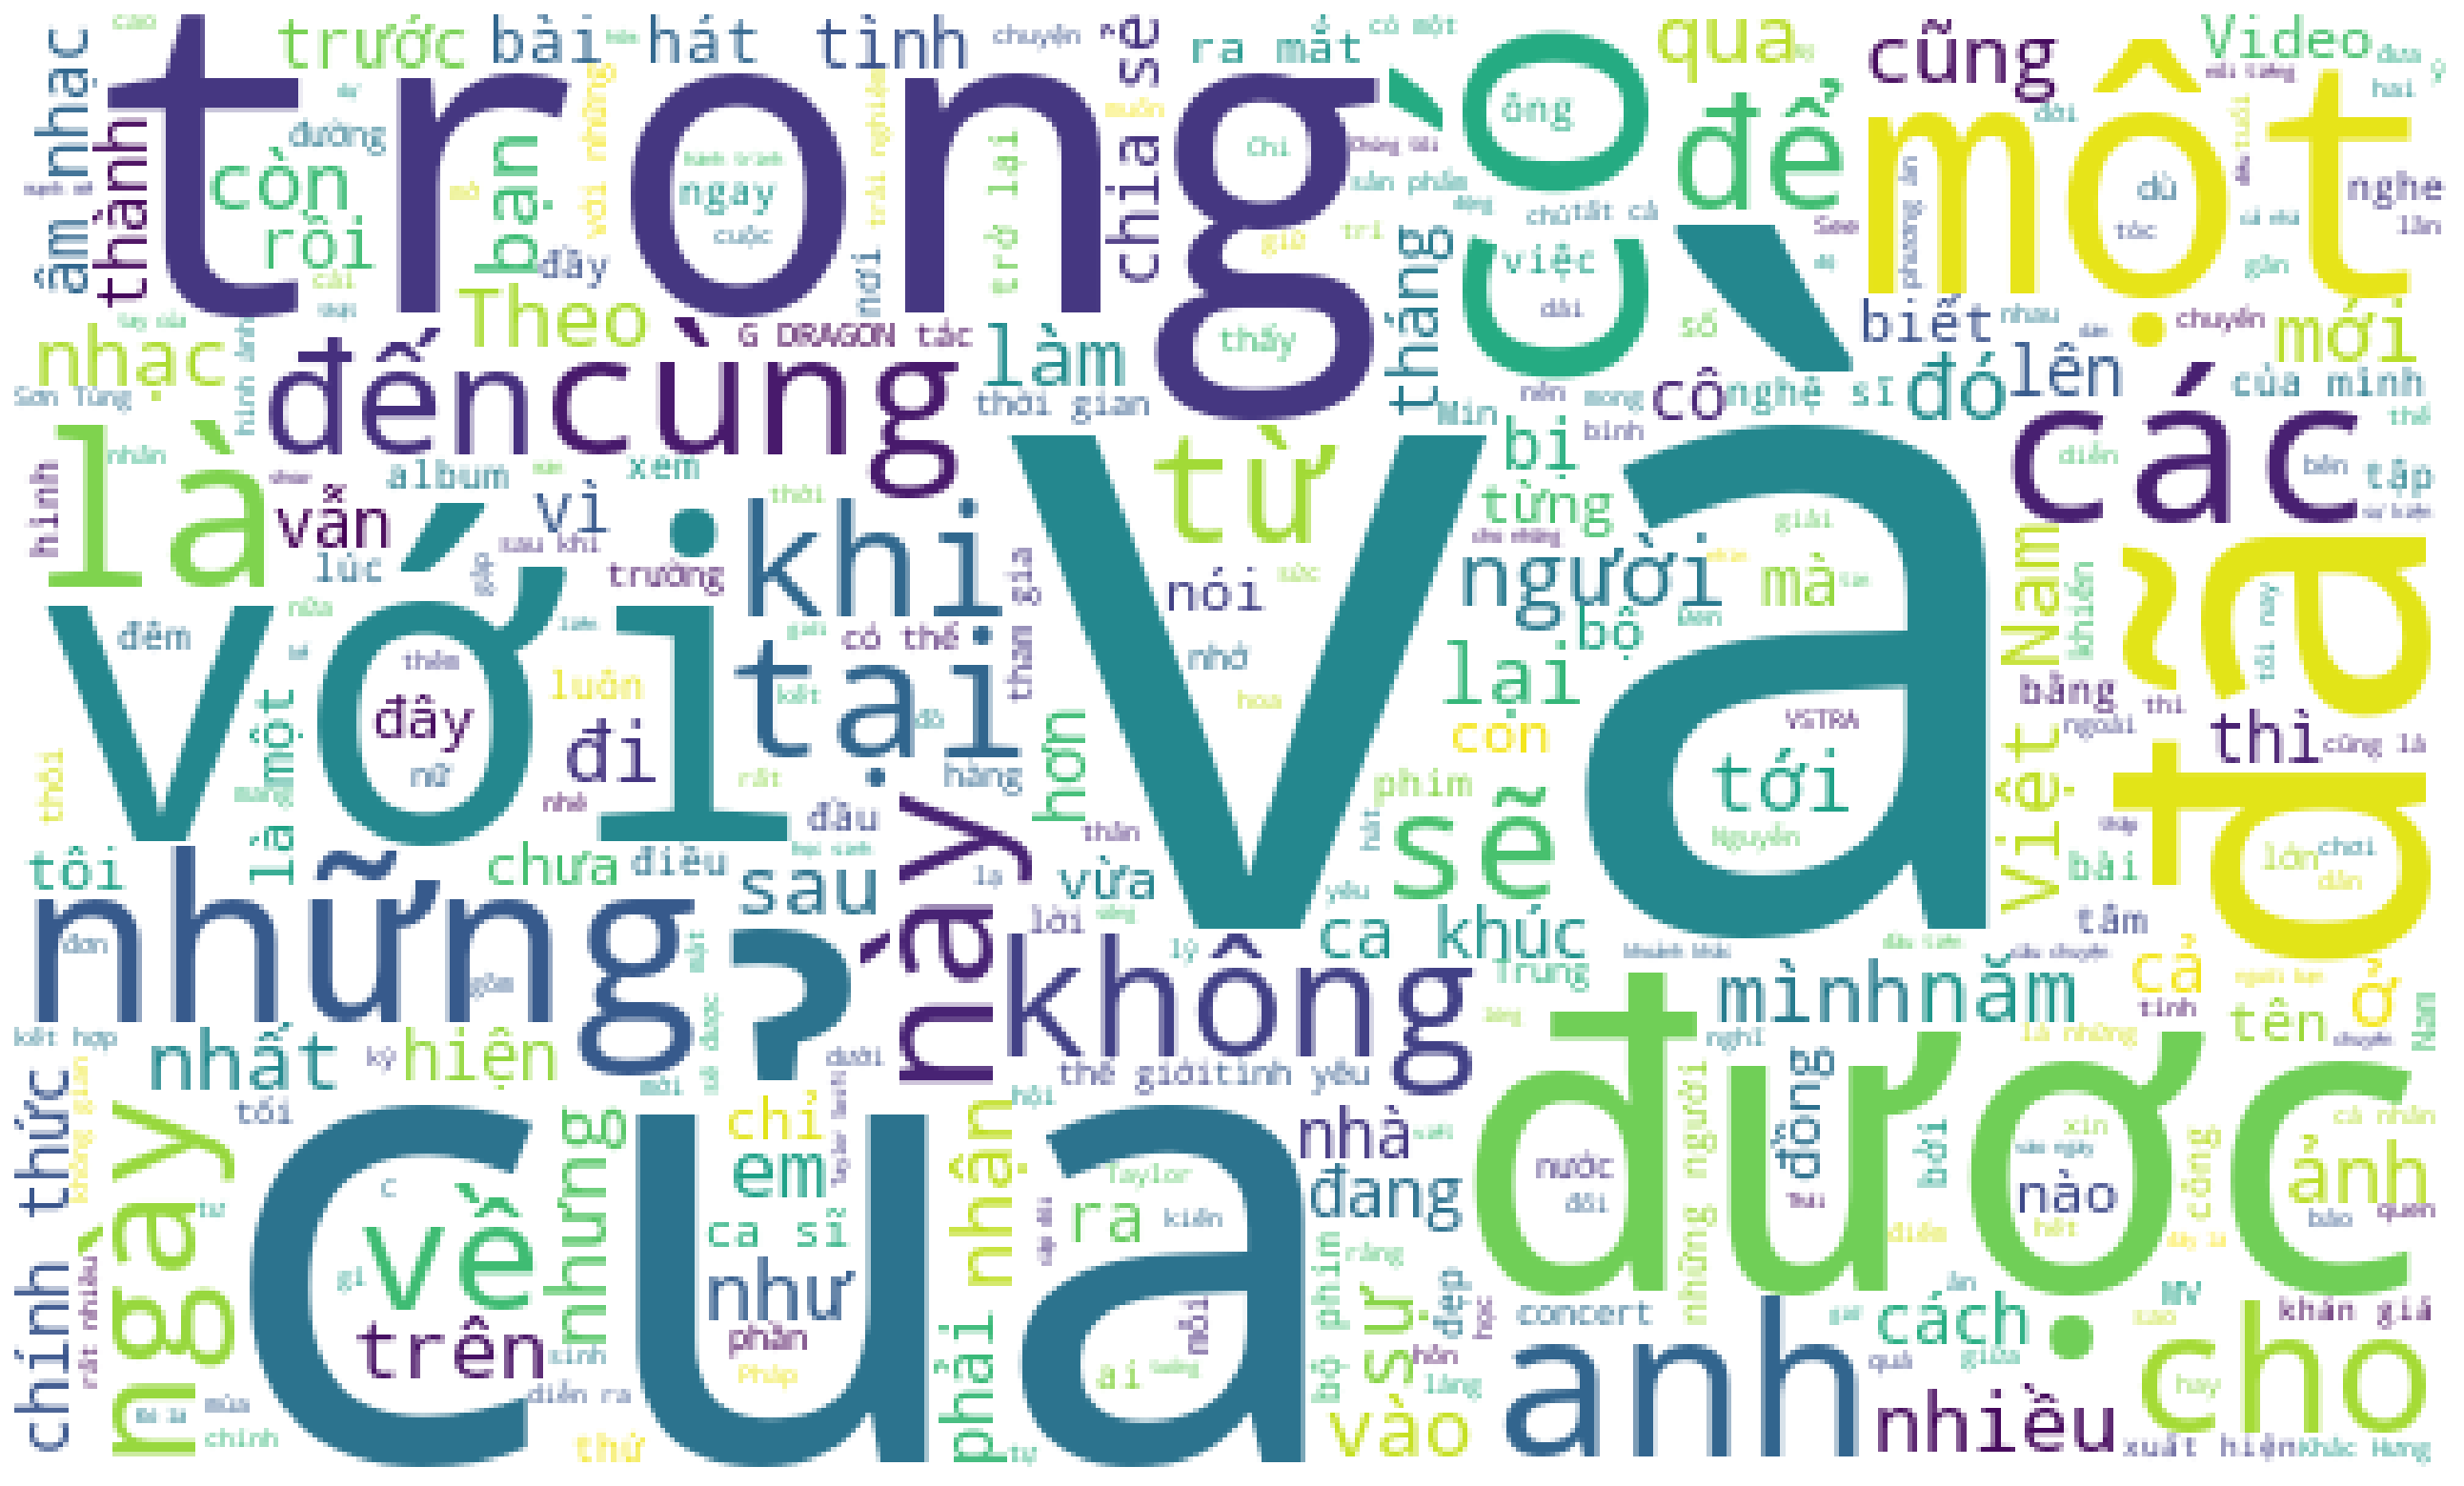

In [134]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [135]:
df['post_id'].head()

0    914197540072635
1    914174400074949
2    914151560077233
3    913951943430528
4    913920416767014
Name: post_id, dtype: int64

In [136]:
reactor_df_full = pd.DataFrame([{'name':'','link':'','type':''}])

In [137]:
for i in df['post_id']:
    reactor = df[df['post_id']== i]
    # chuyển thành list và xử lý dấu không cần thiết .
    reactor_list = reactor['reactors'].to_list()
    data_cleaned = [eval(d) for d in reactor_list]
    # chuyển thành list 1 chiều.
    data = sum(data_cleaned, [])
    # tạo dataframe lưu thông tin tất cả các người react trong bài post.
    temp = pd.DataFrame(data)
    reactor_df_full = pd.concat([reactor_df_full,temp],axis=0,ignore_index=True)
reactor_df_full.head()

,name,link,type
0,,,
1,Lê Ngọc Phát,https://facebook.com/profile.php?id=1000953685...,like
2,진진,https://facebook.com/profile.php?id=1000952785...,like
3,Trong-Huy Nguyen,https://facebook.com/profile.php?id=1000951571...,love
4,Nguyễn Vânn,https://facebook.com/profile.php?id=1000949636...,like


In [138]:
reactor_df_full['name'].value_counts()

name
Phạm Ngọc Minh Quân    106
Phạm Minh Khang         88
Trần Linh               58
Lê Hiếu                 51
Linh Hoang              49
                      ... 
Nguyen Hoai Anh          1
Vũ Gấm                   1
Ng.T.Thanh Hiền          1
Trần Mỹ Duyên            1
Phan Quốc Việt           1
Name: count, Length: 9818, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Sự tương quan giữa thời gian đăng bài và các ngày trong tuần?

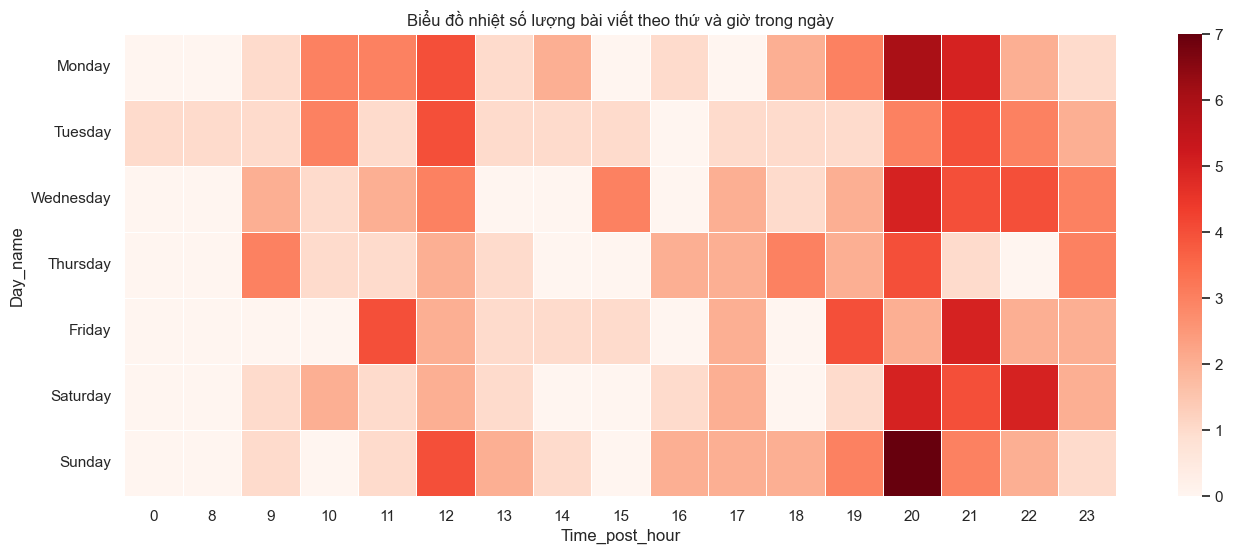

In [139]:
df1 = df
df1['time'] = pd.to_datetime(df1['time'])
#retrieve day name from datetime
df1['Day_name'] = df1['time'].dt.day_name()
# retrieve time_post(hour) from datetime
df1['Time_post_hour'] = df1['time'].dt.hour
# retrieve dd-mm-yy format
df1['post_time'] = df1['time'].dt.strftime('%d-%m-%y')

pivot_df = df1.pivot_table(index = 'Day_name', columns = 'Time_post_hour', aggfunc = 'size', fill_value = 0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(day_order)
plt.figure(figsize=(16, 6))
color_palette = sns.color_palette("Reds", as_cmap=True)
sns.heatmap(pivot_df, cmap=color_palette, annot=False, fmt='d', linewidths=.5)
plt.title('Biểu đồ nhiệt số lượng bài viết theo thứ và giờ trong ngày')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# phan tich name cua nhung nguoi dung tuong tac voi bai viet



In [156]:
names = reactor_df_full['name']
name_list1 = names.tolist()
# print(name_list1)

In [157]:
# lấy name trong commenter_name 
import datetime
import json
df_comments = df
name_list2 = []
for i in range(len(df)):
    x = eval(df_comments['comments_full'].iloc[i])
    for cmt in x:
        name_list2.append(cmt['commenter_name'])  
# print(name_list2)

In [158]:
# lấy name trong comment_reactors 
import datetime
import json
df_comments = df
data = []
for i in range(len(df)):
    x = eval(df_comments['comments_full'].iloc[i])
    for cmt in x:
        data.append(cmt['comment_reactors']) 
name_list3 = []  # Danh sách để lưu trữ các giá trị name

for sublist in data:
    for item in sublist:
        if 'name' in item:
            name = item['name']  # Trích xuất giá trị name từ từng phần tử
            name_list3.append(name)  # Thêm giá trị name vào danh sách name_list

# print(name_list3)


In [146]:
# tổng hợp text của 3 list.
text = ""
for i in name_list1:
    text = text + i + "\n"
for i in name_list2:
    text = text + i + "\n"
for i in name_list3:
    text = text + i + "\n"
len(text)

336513

In [155]:
# print(text)

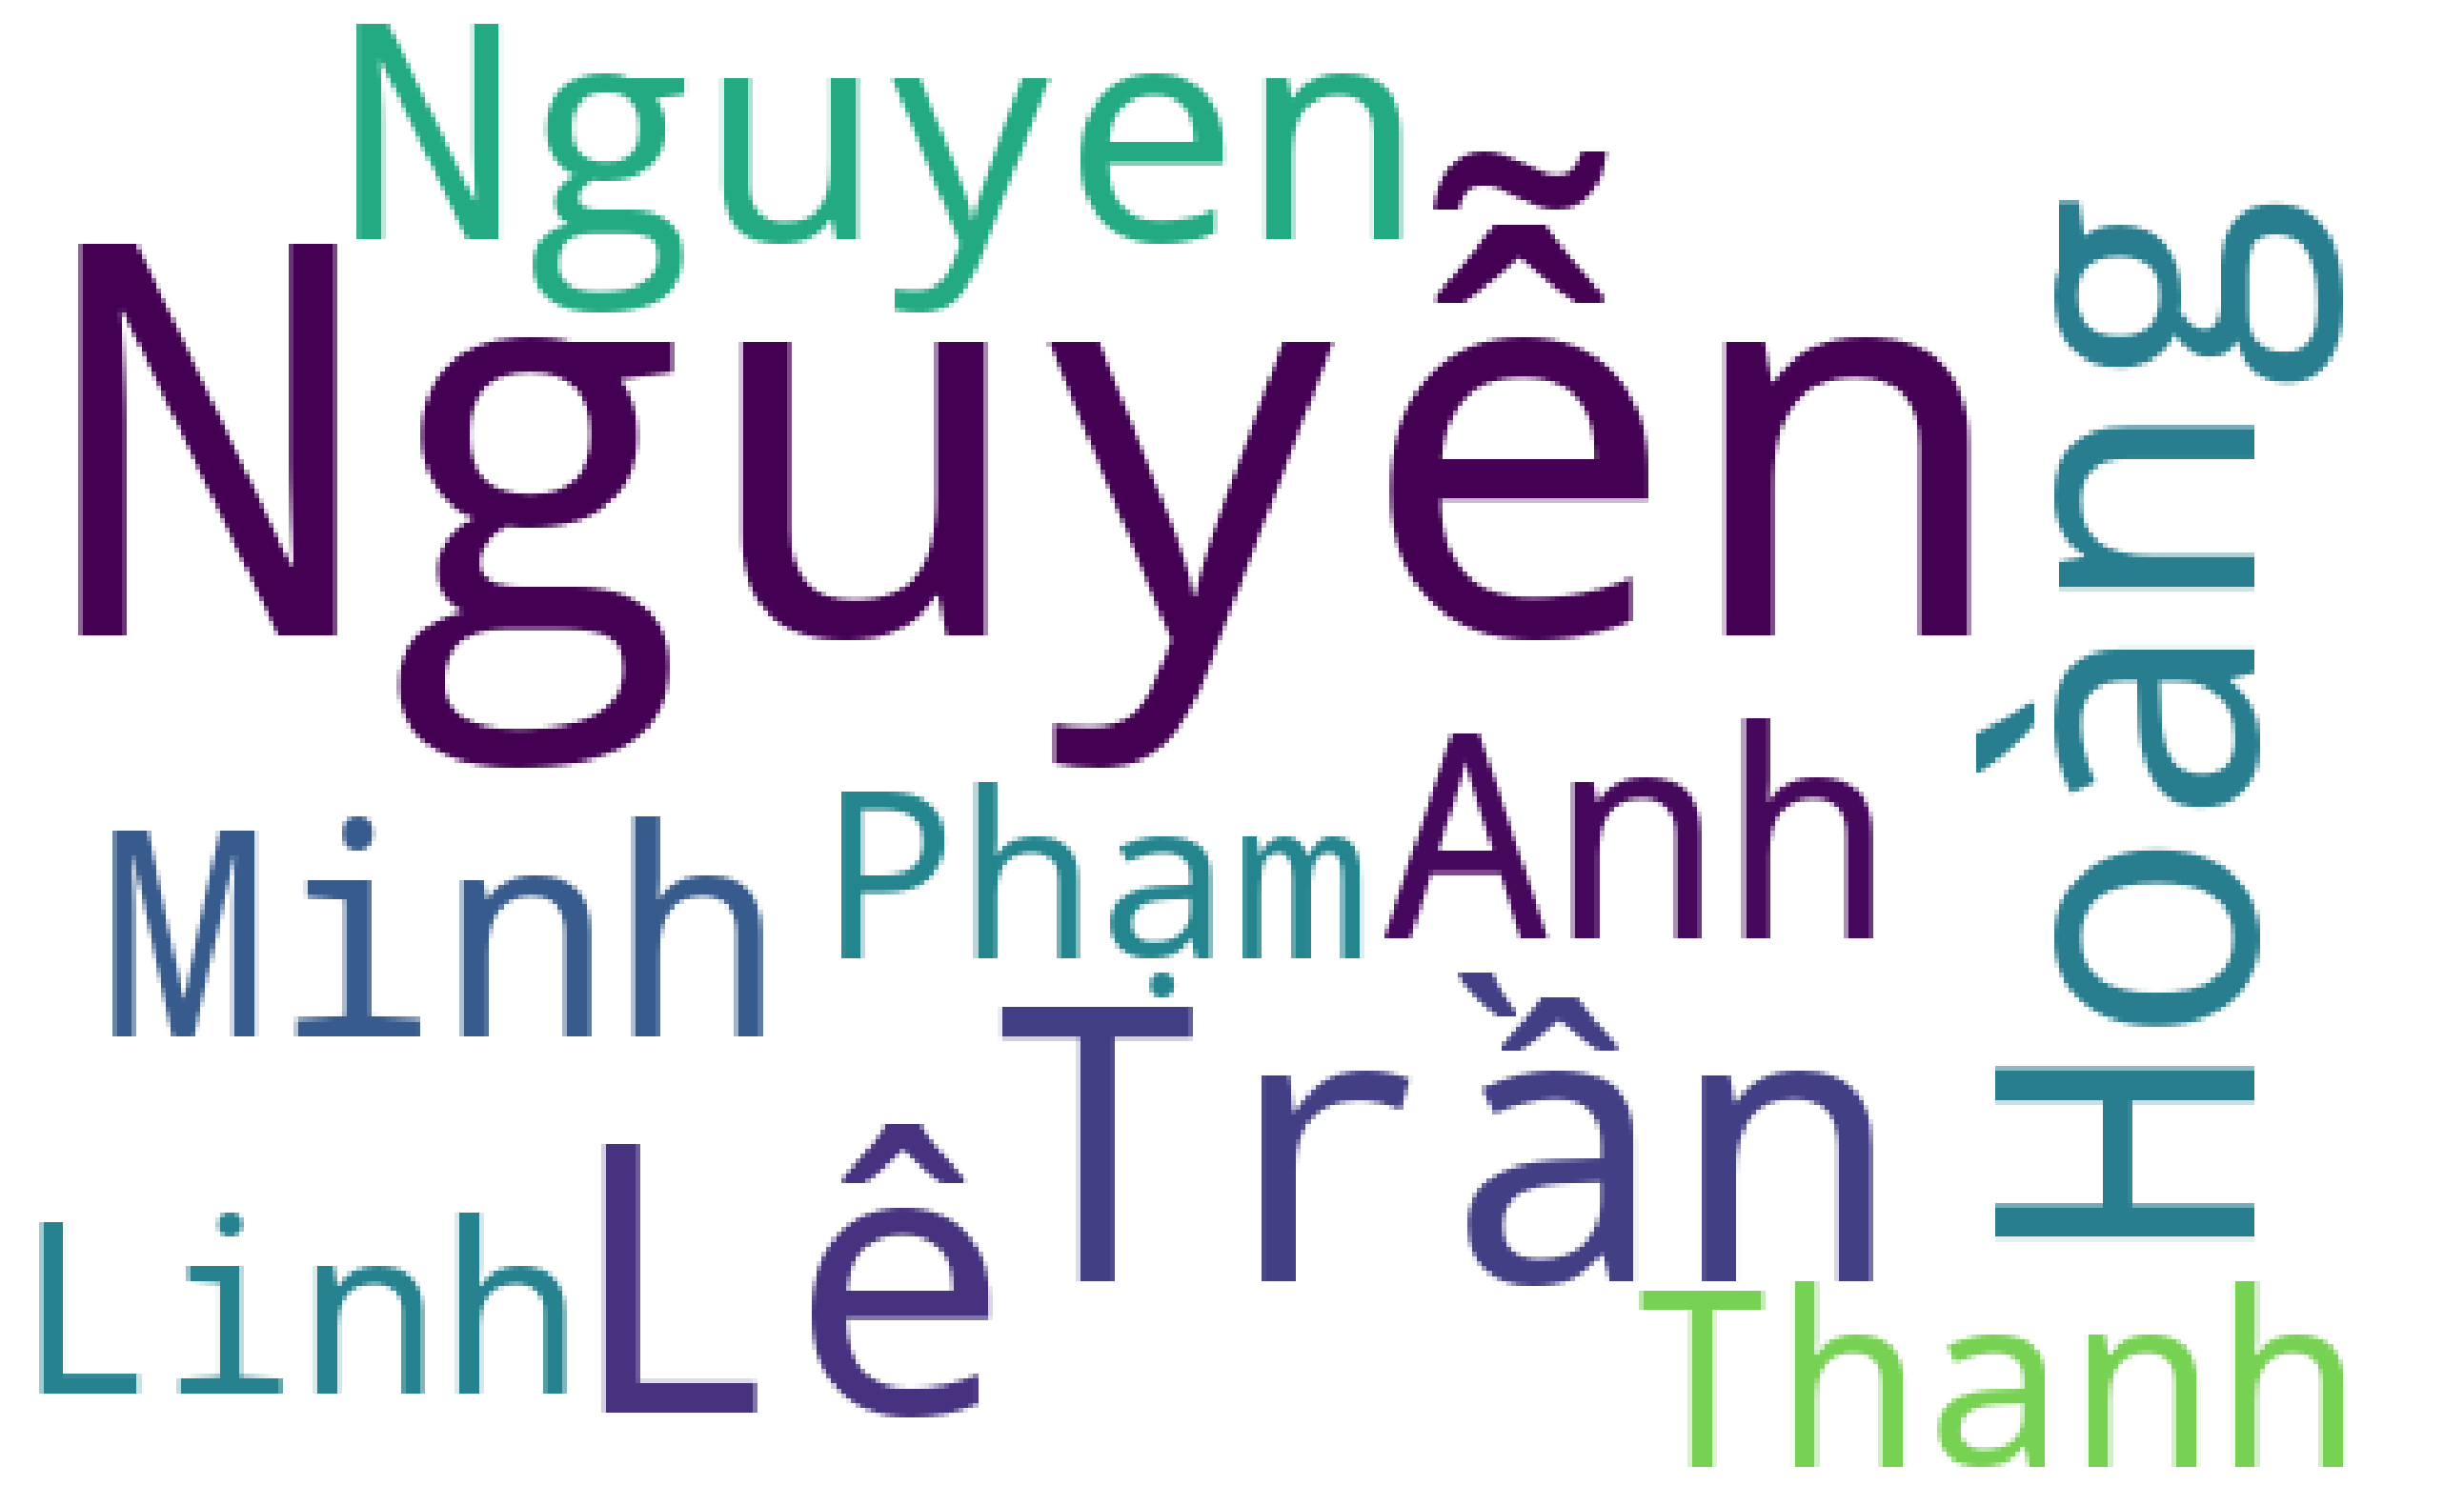

In [148]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=10,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## so sánh tương quan với độ dài bài viết.

In [149]:
post_df_full_with_reactions['post_len'] = post_df_full_with_reactions['post_text'].apply(len).astype(float)
post_df_full_with_reactions['post_len'].head()

0    134.0
1    457.0
2     87.0
3     75.0
4    376.0
Name: post_len, dtype: float64

In [150]:
corr_matrix = post_df_full_with_reactions[['reaction_count', 'comments', 'shares', 'post_len']].corr()

print(corr_matrix)

                reaction_count  comments    shares  post_len
reaction_count        1.000000  0.563349  0.591946 -0.278590
comments              0.563349  1.000000  0.478938 -0.195564
shares                0.591946  0.478938  1.000000 -0.165437
post_len             -0.278590 -0.195564 -0.165437  1.000000


Text(0.5, 1.0, 'Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments, shares và độ dài bài viết')

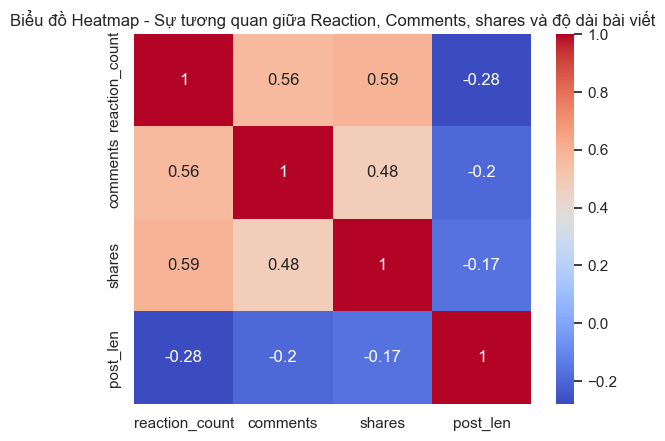

In [151]:
# Vẽ biểu đồ heatmap thể hiện tương quan
sns.set(style="white")  # Chọn giao diện màu sắc
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments, shares và độ dài bài viết')